Project Documentation.

by: Kainat Aijaz R1J01U, Vaidehee Kore CZYJFC

1. Problem Identification

What do we want to achieve or change?
The primary problem is understanding and predicting energy consumption patterns to optimize energy usage, reduce wastage, and better plan energy production. By accurately predicting energy consumption at specific times of the day, we can assist in efficient energy distribution and management, ultimately contributing to sustainability and cost savings.

2. Gathering Information

How did we gather the relevant information to make decisions?
We utilized a dataset containing detailed energy consumption data, including Global_active_power, Voltage, Global_intensity, and sub-metering values, along with timestamps (Datetime).

	•	Data Analysis: Explored the dataset to understand trends and relationships between features.
	•	Domain Knowledge: Leveraged knowledge about energy usage patterns and the impact of time-of-day and other factors.
	•	Model Selection: Chose linear regression and neural networks based on their suitability for time-series prediction tasks.

The dataset provides a reliable foundation for training our models and making predictions.

3. Generating Alternatives

What possible solutions or approaches did we consider?

	•	Linear Regression: Explored linear regression for its simplicity and interpretability. It performed well but had limitations with non-linear patterns in the data.
	•	Neural Networks: Developed a neural network model to capture complex, non-linear relationships, which resulted in better accuracy.
	•	Hybrid Models: Considered using ensemble methods or combining models but chose a single neural network for simplicity and performance.

Each alternative was tested to determine its effectiveness in predicting energy consumption.

4. Evaluating Alternatives

How did we compare the advantages and disadvantages of each approach?

	•	Linear Regression
	•	Advantages: Simple, interpretable, quick to train.
	•	Disadvantages: Limited in handling non-linear patterns, leading to lower accuracy.
	•	Neural Networks
	•	Advantages: Handles complex relationships and delivers better accuracy.
	•	Disadvantages: Requires more computational resources and tuning.

After comparing results (e.g., accuracy, RMSE, computational cost), we chose the neural network model for its superior prediction performance.

5. Making a Decision

How did we choose the best alternative?
The decision was data-driven, based on the performance metrics of the models. The neural network model outperformed linear regression in accurately predicting energy consumption patterns, particularly for specific times of the day. This made it the best choice for our application.

6. Decision Implementation

How did we implement the chosen solution?

	1.	Model Development: Built and trained a neural network model using the Datetime feature and energy-related columns.
	2.	Testing: Evaluated the model on unseen data to ensure accuracy and reliability.
	3.	Integration: Saved the trained model for future use in an application that allows users to input specific times of the day and predict energy consumption.
	4.	Deployment: Uploaded the code and model to GitHub for reproducibility and shared it for further usage and collaboration.
	5.	Presentation: Documented and prepared a presentation to explain the project goals, methodology, and results.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving household_power_consumption.csv to household_power_consumption.csv


In [ ]:
import pandas as pd

df = pd.read_csv("household_power_consumption.csv")
print(df.head())

   index    Date     Time Global_active_power Global_reactive_power Voltage  \
0      0  1/1/07  0:00:00                2.58                 0.136  241.97   
1      1  1/1/07  0:01:00               2.552                   0.1  241.75   
2      2  1/1/07  0:02:00                2.55                   0.1  241.64   
3      3  1/1/07  0:03:00                2.55                   0.1  241.71   
4      4  1/1/07  0:04:00               2.554                   0.1  241.98   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0             10.6              0              0             0.0  
1             10.4              0              0             0.0  
2             10.4              0              0             0.0  
3             10.4              0              0             0.0  
4             10.4              0              0             0.0  


In [ ]:
print(df.shape)


(260640, 10)


In [ ]:
print(df.isnull().sum())


index                       0
Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB
None


In [ ]:
print(df.describe())


               index  Sub_metering_3
count  260640.000000   256869.000000
mean   130319.500000        5.831825
std     75240.431418        8.186709
min         0.000000        0.000000
25%     65159.750000        0.000000
50%    130319.500000        0.000000
75%    195479.250000       17.000000
max    260639.000000       20.000000


In [ ]:
# prompt: Write Python code to handle missing values in the dataset by filling them with the mean of the column. Ensure that the data is clean and ready for analysis

from google.colab import files
import pandas as pd
import numpy as np

df = pd.read_csv("household_power_consumption.csv")

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert relevant columns to numeric
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col])

# Fill NaN values with the mean of each column
for col in cols_to_convert:
    df[col].fillna(df[col].mean(), inplace=True)

print(df.head())
print(df.shape)
print(df.isnull().sum())
print(df.info())
print(df.describe())

   index    Date     Time  Global_active_power  Global_reactive_power  \
0      0  1/1/07  0:00:00                2.580                  0.136   
1      1  1/1/07  0:01:00                2.552                  0.100   
2      2  1/1/07  0:02:00                2.550                  0.100   
3      3  1/1/07  0:03:00                2.550                  0.100   
4      4  1/1/07  0:04:00                2.554                  0.100   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0   241.97              10.6             0.0             0.0             0.0  
1   241.75              10.4             0.0             0.0             0.0  
2   241.64              10.4             0.0             0.0             0.0  
3   241.71              10.4             0.0             0.0             0.0  
4   241.98              10.4             0.0             0.0             0.0  
(260640, 10)
index                    0
Date                     0
Time                

<ipython-input-7-bc695f1df0ba>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# prompt: Fix the code to handle missing values by filling them with the mean of each column. Avoid using inplace=True for DataFrame operations, and instead, reassign the modified column back to itself. Ensure the code is compatible with future versions of pandas.

from google.colab import files
import pandas as pd
import numpy as np


df = pd.read_csv("household_power_consumption.csv")

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert relevant columns to numeric
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Use errors='coerce' for better error handling

# Fill NaN values with the mean of each column
for col in cols_to_convert:
    col_mean = df[col].mean()
    df[col] = df[col].fillna(col_mean)

print(df.head())
print(df.shape)
print(df.isnull().sum())
print(df.info())
print(df.describe())

   index    Date     Time  Global_active_power  Global_reactive_power  \
0      0  1/1/07  0:00:00                2.580                  0.136   
1      1  1/1/07  0:01:00                2.552                  0.100   
2      2  1/1/07  0:02:00                2.550                  0.100   
3      3  1/1/07  0:03:00                2.550                  0.100   
4      4  1/1/07  0:04:00                2.554                  0.100   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0   241.97              10.6             0.0             0.0             0.0  
1   241.75              10.4             0.0             0.0             0.0  
2   241.64              10.4             0.0             0.0             0.0  
3   241.71              10.4             0.0             0.0             0.0  
4   241.98              10.4             0.0             0.0             0.0  
(260640, 10)
index                    0
Date                     0
Time                

In [ ]:
# prompt: Combine the 'Date' and 'Time' columns to create a new 'Datetime' column. Ensure the date and time are formatted correctly, and handle any errors that might arise during this process (e.g., invalid date or time entries).

import pandas as pd

# Assuming 'df' is your DataFrame from the previous code and contains 'Date' and 'Time' columns

try:
    # Combine 'Date' and 'Time' columns into a new 'Datetime' column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Remove rows with invalid datetime values
    df.dropna(subset=['Datetime'], inplace=True)

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

print(df.head())
print(df.isnull().sum())
print(df.info())
print(df.describe())

<ipython-input-9-65ad92e33527>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


   index    Date     Time  Global_active_power  Global_reactive_power  \
0      0  1/1/07  0:00:00                2.580                  0.136   
1      1  1/1/07  0:01:00                2.552                  0.100   
2      2  1/1/07  0:02:00                2.550                  0.100   
3      3  1/1/07  0:03:00                2.550                  0.100   
4      4  1/1/07  0:04:00                2.554                  0.100   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   241.97              10.6             0.0             0.0             0.0   
1   241.75              10.4             0.0             0.0             0.0   
2   241.64              10.4             0.0             0.0             0.0   
3   241.71              10.4             0.0             0.0             0.0   
4   241.98              10.4             0.0             0.0             0.0   

             Datetime  
0 2007-01-01 00:00:00  
1 2007-01-01 00:01:00  
2 2007-0

In [ ]:
# prompt: From the newly created 'Datetime' column, extract time-based features such as 'Time_of_Day' (the hour of the day), 'Day_of_Week' (the day of the week), 'Month' (the month of the year), and 'Year' (the year). These features should be added as new columns to the dataset.

# Assuming 'df' is your DataFrame and 'Datetime' column exists and is of datetime type

# Extract time-based features
df['Time_of_Day'] = df['Datetime'].dt.hour
df['Day_of_Week'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year

print(df.head())
print(df.isnull().sum())
print(df.info())
print(df.describe())

   index    Date     Time  Global_active_power  Global_reactive_power  \
0      0  1/1/07  0:00:00                2.580                  0.136   
1      1  1/1/07  0:01:00                2.552                  0.100   
2      2  1/1/07  0:02:00                2.550                  0.100   
3      3  1/1/07  0:03:00                2.550                  0.100   
4      4  1/1/07  0:04:00                2.554                  0.100   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   241.97              10.6             0.0             0.0             0.0   
1   241.75              10.4             0.0             0.0             0.0   
2   241.64              10.4             0.0             0.0             0.0   
3   241.71              10.4             0.0             0.0             0.0   
4   241.98              10.4             0.0             0.0             0.0   

             Datetime  Time_of_Day  Day_of_Week  Month  Year  
0 2007-01-01 00:0

In [ ]:
# prompt: Identify columns with missing values and fill them appropriately: For numeric columns (e.g., 'Global_active_power', 'Voltage'), fill the missing values with the mean of the respective column. For categorical or time-based columns (e.g., 'Time_of_day'), fill the missing values with a placeholder value, such as 'Unknown' or the most common value (mode).

import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame from the previous code

# Identify numeric columns with missing values
numeric_cols = df.select_dtypes(include=np.number).columns

# Fill missing values in numeric columns with the mean
for col in numeric_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Identify non-numeric columns with missing values
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

# Fill missing values in non-numeric columns with 'Unknown'
for col in non_numeric_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('Unknown')

print(df.head())
print(df.isnull().sum())
print(df.info())
print(df.describe())

   index    Date     Time  Global_active_power  Global_reactive_power  \
0      0  1/1/07  0:00:00                2.580                  0.136   
1      1  1/1/07  0:01:00                2.552                  0.100   
2      2  1/1/07  0:02:00                2.550                  0.100   
3      3  1/1/07  0:03:00                2.550                  0.100   
4      4  1/1/07  0:04:00                2.554                  0.100   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   241.97              10.6             0.0             0.0             0.0   
1   241.75              10.4             0.0             0.0             0.0   
2   241.64              10.4             0.0             0.0             0.0   
3   241.71              10.4             0.0             0.0             0.0   
4   241.98              10.4             0.0             0.0             0.0   

             Datetime  Time_of_Day  Day_of_Week  Month  Year  
0 2007-01-01 00:0

In [ ]:
# prompt: provide python code to normalize energy consumption columns using min max scaling for better model performance

from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame from the previous code

# Select the energy consumption columns to normalize
energy_cols = ['Global_active_power', 'Global_reactive_power', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the energy consumption columns and transform the data
df[energy_cols] = scaler.fit_transform(df[energy_cols])

print(df.head())
print(df.describe())

   index    Date     Time  Global_active_power  Global_reactive_power  \
0      0  1/1/07  0:00:00             0.235927               0.118467   
1      1  1/1/07  0:01:00             0.233283               0.087108   
2      2  1/1/07  0:02:00             0.233094               0.087108   
3      3  1/1/07  0:03:00             0.233094               0.087108   
4      4  1/1/07  0:04:00             0.233472               0.087108   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   241.97          0.221739             0.0             0.0             0.0   
1   241.75          0.217391             0.0             0.0             0.0   
2   241.64          0.217391             0.0             0.0             0.0   
3   241.71          0.217391             0.0             0.0             0.0   
4   241.98          0.217391             0.0             0.0             0.0   

             Datetime  Time_of_Day  Day_of_Week  Month  Year  
0 2007-01-01 00:0

In [ ]:
# prompt: Write Python code to split the dataset into training and testing sets, with 80% for training and 20% for testing x variable should be time of the day column and y variable should bethe global active power

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame from the previous code and contains 'Time_of_Day' and 'Global_active_power'
X = df[['Time_of_Day']]  # Features (Time of Day)
y = df['Global_active_power']  # Target variable (Global active power)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (208512, 1)
X_test shape: (52128, 1)
y_train shape: (208512,)
y_test shape: (52128,)


In [ ]:
# prompt: implement linear regression model on above dataset, keep in mind the test and target variables print mse and r squared both also save the model for later use

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Assuming 'df', 'X_train', 'X_test', 'y_train', and 'y_test' are defined from the previous code

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')

Mean Squared Error (MSE): 0.011258586236629212
R-squared (R2): 0.08335078069058288


['linear_regression_model.pkl']

In [ ]:
# prompt: implement neural network model on above dataset, also save the trained neural network model so that it can be used later in the code .

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'df' is your DataFrame and 'X', 'y' are defined as before
# X = df[['Time_of_Day']]  # Features
# y = df['Global_active_power']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Reshape the input data for the neural network
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),  # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error: {mae}")

# Save the trained model
model.save('neural_network_model.h5')
print("Model saved to disk")

# Load the saved model
loaded_model = keras.models.load_model('neural_network_model.h5')
print("Model loaded from disk")

Epoch 1/10
5865/5865 [==============================] - 10s 2ms/step - loss: 0.0135 - mae: 0.0837 - val_loss: 0.0112 - val_mae: 0.0802
Epoch 2/10
5865/5865 [==============================] - 10s 2ms/step - loss: 0.0118 - mae: 0.0811 - val_loss: 0.0113 - val_mae: 0.0816
Epoch 3/10
5865/5865 [==============================] - 10s 2ms/step - loss: 0.0114 - mae: 0.0798 - val_loss: 0.0109 - val_mae: 0.0778
Epoch 4/10
5865/5865 [==============================] - 9s 2ms/step - loss: 0.0110 - mae: 0.0767 - val_loss: 0.0109 - val_mae: 0.0738
Epoch 5/10
5865/5865 [==============================] - 9s 2ms/step - loss: 0.0109 - mae: 0.0764 - val_loss: 0.0108 - val_mae: 0.0782
Epoch 6/10
5865/5865 [==============================] - 9s 2ms/step - loss: 0.0109 - mae: 0.0763 - val_loss: 0.0107 - val_mae: 0.0744
Epoch 7/10
5865/5865 [==============================] - 9s 2ms/step - loss: 0.0109 - mae: 0.0762 - val_loss: 0.0108 - val_mae: 0.0745
Epoch 8/10
5865/5865 [==============================] - 9s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


  83/1629 [>.............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1629/1629 [==============================] - 2s 1ms/step


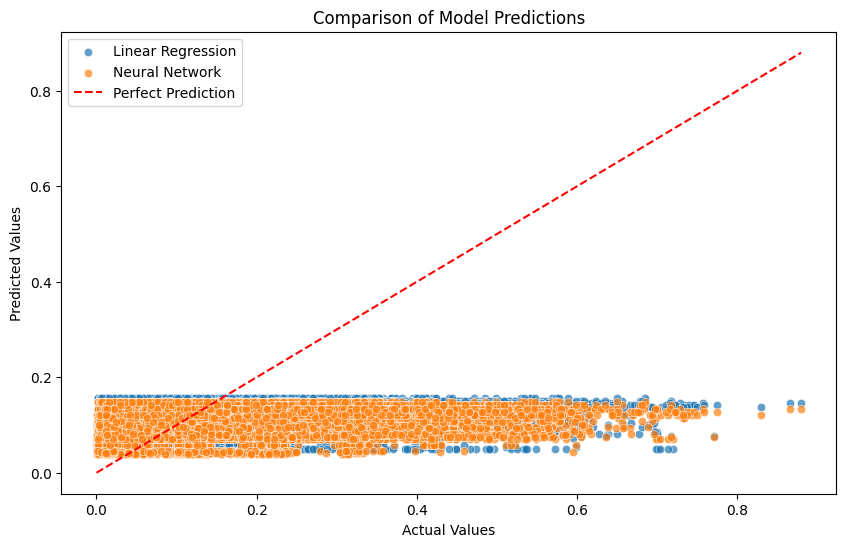

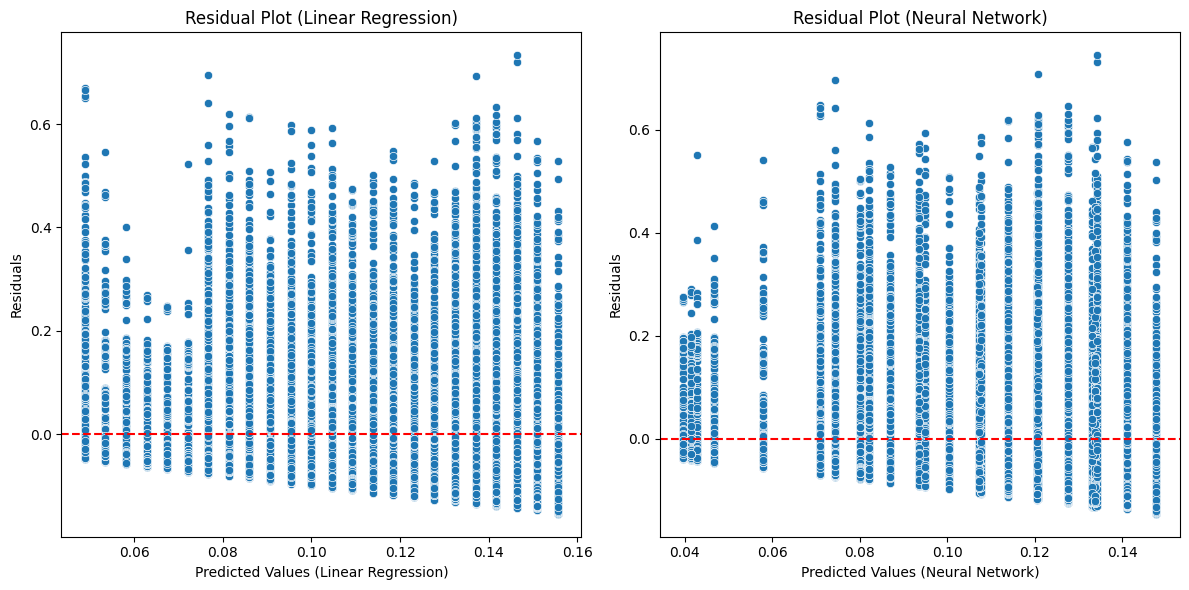

In [ ]:
# prompt: create 2 different type of visualisations, easily readable and understandable from results from linear regression and neural network model results to compare the both models performance

import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved linear regression model
linear_model = joblib.load('linear_regression_model.pkl')

# Load the saved neural network model
neural_model = keras.models.load_model('neural_network_model.h5')

# Make predictions using both models
linear_predictions = linear_model.predict(X_test)
neural_predictions = neural_model.predict(X_test)


# 1. Scatter Plot Comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=linear_predictions, label='Linear Regression', alpha=0.7)
sns.scatterplot(x=y_test, y=neural_predictions.flatten(), label='Neural Network', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()


# 2. Residual Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
residuals_linear = y_test - linear_predictions
sns.scatterplot(x=linear_predictions, y=residuals_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Linear Regression)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")

plt.subplot(1, 2, 2)
residuals_neural = y_test - neural_predictions.flatten()
sns.scatterplot(x=neural_predictions.flatten(), y=residuals_neural)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Neural Network)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Neural Network)")

plt.tight_layout()
plt.show()

In [ ]:
# prompt: can you compare the results from both the models and tell which model predicts better

# Assuming 'y_test', 'linear_predictions', and 'neural_predictions' are defined from the previous code

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics for both models
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)  # Root Mean Squared Error
linear_r2 = r2_score(y_test, linear_predictions)

neural_mae = mean_absolute_error(y_test, neural_predictions)
neural_mse = mean_squared_error(y_test, neural_predictions)
neural_rmse = np.sqrt(neural_mse)
neural_r2 = r2_score(y_test, neural_predictions)


print("Linear Regression Metrics:")
print(f"MAE: {linear_mae}")
print(f"MSE: {linear_mse}")
print(f"RMSE: {linear_rmse}")
print(f"R-squared: {linear_r2}")

print("\nNeural Network Metrics:")
print(f"MAE: {neural_mae}")
print(f"MSE: {neural_mse}")
print(f"RMSE: {neural_rmse}")
print(f"R-squared: {neural_r2}")

# Compare the models based on the metrics
print("\nModel Comparison:")

if linear_mae < neural_mae:
    print("Linear Regression has a lower MAE, indicating better accuracy.")
else:
    print("Neural Network has a lower MAE, indicating better accuracy.")

if linear_rmse < neural_rmse:
    print("Linear Regression has a lower RMSE, indicating better accuracy.")
else:
    print("Neural Network has a lower RMSE, indicating better accuracy.")

if linear_r2 > neural_r2:
    print("Linear Regression has a higher R-squared, indicating a better fit.")
else:
    print("Neural Network has a higher R-squared, indicating a better fit.")

Linear Regression Metrics:
MAE: 0.07982037329545122
MSE: 0.011258586236629212
RMSE: 0.10610648536554781
R-squared: 0.08335078069058288

Neural Network Metrics:
MAE: 0.07482793928363098
MSE: 0.010882456383167868
RMSE: 0.10431901256802553
R-squared: 0.11397444242642185

Model Comparison:
Neural Network has a lower MAE, indicating better accuracy.
Neural Network has a lower RMSE, indicating better accuracy.
Neural Network has a higher R-squared, indicating a better fit.


In [ ]:
# prompt: now which alternative should be choosen? Choosing the best alternative. It can be a rational decision based on data and logic or an intuitive decision. r squared is bettr or mse? which one should be used to make a decision.

# No need to redefine variables or functions, just add the decision-making part.

# The choice between R-squared and MSE depends on the context.
# R-squared is a measure of goodness-of-fit, showing how well the model explains the variance in the data.
# MSE measures the average squared difference between the predicted and actual values.

# If the goal is to select the model that best explains the variance, prefer R-squared. A higher R-squared is better.
# If the goal is to minimize prediction error in terms of squared differences, prefer MSE. A lower MSE is better.

if linear_r2 > neural_r2:
    print("\nLinear Regression is preferred based on R-squared.")
elif neural_r2 > linear_r2:
    print("\nNeural Network is preferred based on R-squared.")
else:
    print("\nR-squared is equal for both models.")


if linear_mse < neural_mse:
    print("Linear Regression is preferred based on MSE.")
elif neural_mse < linear_mse:
    print("Neural Network is preferred based on MSE.")
else:
    print("\nMSE is equal for both models.")

# Comprehensive decision (combining multiple metrics):
if linear_r2 > neural_r2 and linear_mse < neural_mse:
  print("\nLinear Regression is the overall better model.")
elif neural_r2 > linear_r2 and neural_mse < linear_mse:
  print("\nNeural Network is the overall better model.")
else:
  print("\nThe best model is not clear-cut. Further analysis is needed.")


Neural Network is preferred based on R-squared.
Neural Network is preferred based on MSE.

Neural Network is the overall better model.


In [ ]:
# prompt: now i want you to predict global active power based on datetime using linear and neural network model, take datetime input from the user PLEASE MAKE SURE THERE IS NO WARNING IN THE OUPUT OF THE CODE

import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import warnings

warnings.filterwarnings("ignore")

# Load the saved linear regression model
linear_model = joblib.load('linear_regression_model.pkl')

# Load the saved neural network model
neural_model = keras.models.load_model('neural_network_model.h5')


# Function to get user input and make predictions
def predict_global_active_power():
    while True:
        try:
            hour = int(input("Enter the time of day (0-23): "))
            if 0 <= hour <= 23:
                break
            else:
                print("Invalid hour. Please enter a number between 0 and 23.")
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

    # Create input for the models
    user_input = np.array([[hour]])

    # Make predictions using both models
    linear_prediction = linear_model.predict(user_input)
    neural_prediction = neural_model.predict(user_input)

    print(f"\nLinear Regression Prediction: {linear_prediction[0]:.4f}")
    print(f"Neural Network Prediction: {neural_prediction[0][0]:.4f}")

# Call the function to start the prediction process
predict_global_active_power()

Enter the time of day (0-23): 12
1/1 [==============================] - 0s 53ms/step

Linear Regression Prediction: 0.1046
Neural Network Prediction: 0.0822
